In [86]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

generate unique delays

In [87]:
NUMBER_OF_PAIRS = 5000
PD_COUNT = 1000

MIN_RANGE = 300.0
MAX_RANGE = 1200.0
MIN_DIVIATION = -0.10
MAX_DIVIATION = +0.10

# SAME_DELAYS = False
SAME_DELAYS = True

In [88]:
def select_pairs_of_indexes(number_of_pairs: int, count: int) -> set:
    """select N random pairs of indexes"""
    pairs = set()

    while len(pairs) < number_of_pairs:
        first = random.randint(0, count - 1)
        second = random.randint(0, count - 1)
        pairs.add((first, second))

    return pairs


def calc_bit_vector(pd: set, pairs: list) -> list:
    bit_vector = list()
    delays = list(prop_delays)

    for i in pairs:
        x = delays[i[0]]
        y = delays[i[1]]

        res = 1 if x > y else 0
        bit_vector.append(res)

    return bit_vector


def generate_propagation_delays(same_delays: bool, pd_count: int) -> set:
    prop_delays = set()

    if SAME_DELAYS:
        while len(prop_delays) < pd_count:
            diviation = MIN_RANGE * random.uniform(MIN_DIVIATION, MAX_DIVIATION)
            prop_delays.add(MIN_RANGE + diviation)
    else:
        while len(prop_delays) < pd_count:
            value = random.uniform(MIN_RANGE, MAX_RANGE)
            diviation = value * random.uniform(MIN_DIVIATION, MAX_DIVIATION)
            prop_delays.add(value + diviation)

    return prop_delays


def calc_bit_vector_metrics(bit_vector: list) -> int:
    ones = 0
    zeros = 0

    for i in bit_vector:
        if i == 0:
            zeros += 1
        else:
            ones += 1

    uniformity = 1 / len(bit_vector) * sum(bit_vector)
    return uniformity
    # print(f"ones = {ones}, zeros = {zeros}")
    # print(f"uniformity = {uniformity}")

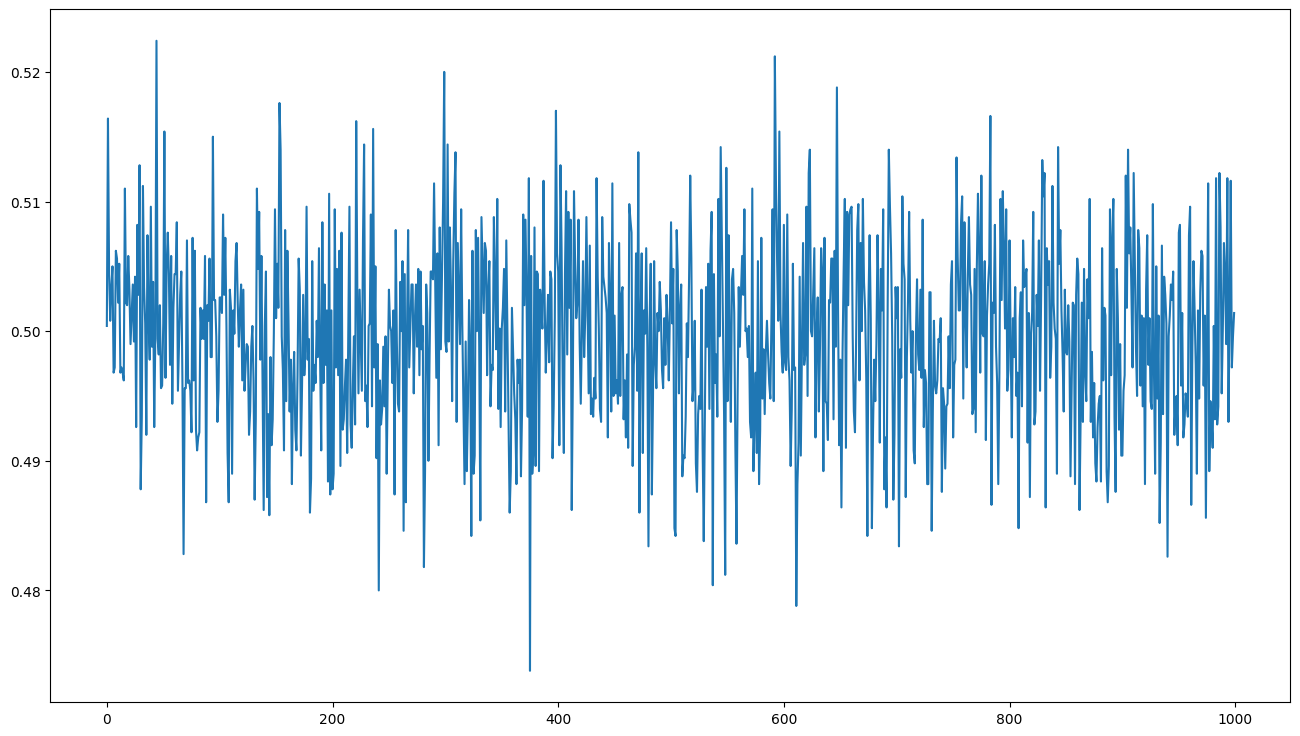

In [96]:
prop_delays = generate_propagation_delays(SAME_DELAYS, PD_COUNT)


unif = []
vectors = []
for _ in range(1000):
    pairs = select_pairs_of_indexes(NUMBER_OF_PAIRS, len(prop_delays))
    bit_vector = calc_bit_vector(prop_delays, pairs)
    uniformity = calc_bit_vector_metrics(bit_vector)
    unif.append(uniformity)
    vectors.append(bit_vector)


plt.figure(figsize=(16, 9))
plt.plot(unif)
# plt.hist(prop_delays)
# plt.hist(bit_vector)